In [247]:
#https://stackoverflow.com/questions/42025077/how-to-apply-calculations-to-elements-of-a-multidimensional-matrix-in-tensorflow
#https://learningtensorflow.com/lesson4/    
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os


In [248]:
# First, load the image again
dir_path = os.path.dirname(os.path.realpath('__file__'))
filename = dir_path + "/apple.jpg"
print(filename)
raw_image_data = mpimg.imread(filename)


/notebooks/apple.jpg


In [249]:
image = tf.placeholder("float", [None, None, None])
#slice(entrada,inicio,tamaño,name=None)
r = tf.slice(image,[0,0,0],[-1,-1,1])
g = tf.slice(image,[0,0,1],[-1,-1,1])
b = tf.slice(image,[0,0,2],[-1,-1,1])

In [250]:
#r = tf.scalar_mul(0.2126,r)
#g = tf.scalar_mul(0.7152,g)
#b = tf.scalar_mul(0.0722,b)
grey = tf.add(r,tf.add(g,b))


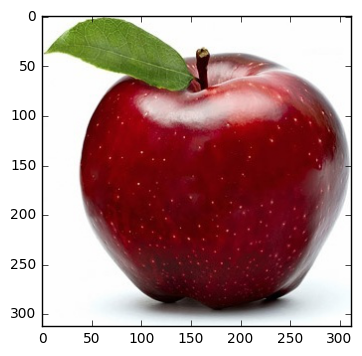

In [251]:
#concat(valores,eje,name='concat{})
#out = tf.concat(2, [r,g,b])
#out = tf.concat(2, [grey,grey, grey])
out = tf.concat(2, [r,g,b])
out = tf.cast(out, tf.uint8)

with tf.Session() as session:
    result = session.run(out, feed_dict={image: raw_image_data})
    plt.imshow(result)
    plt.show()

(313, 312, 3)


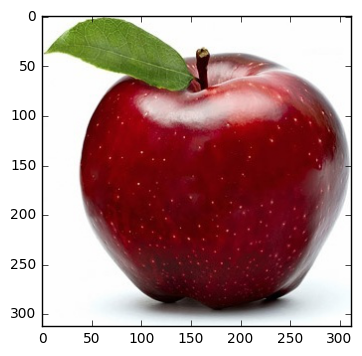

In [252]:

image2 = tf.placeholder("uint8", [None, None, 3])
# tf.slice(image2, [inicio, inicio, inicio], [filas, -1, -1])
slice = tf.slice(image2, [0, 0, 0], [313, -1, -1])

with tf.Session() as session:
    result = session.run(slice, feed_dict={image2: raw_image_data})
    print(result.shape)

plt.imshow(result)
plt.show()